# FYP Python Code
This is the code for the generation of the models spoken about in my report.
Here was where I developed and researched the dataset and model used for my interface website.

## Pre-Processing of COMPAS

In [1]:
import numpy as np
import pandas as pd

#Includes the actual 2 year later reoffender status.
compas = pd.read_csv('compas-scores-two-years.csv')
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


### NaN filtering and removing of un-needed columns

Here I remove the columns which have a high amount of NaNs and columns and complietment features (such as ones which reference time/date)

In [2]:
compas.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

'decile_score', 'score_text' are the compas algo results/prediction score of risk of redvisim. 
Dont think it is needed to include as its an algo prediction, not a true human result.
r_charge_desc can be used to see the description of r_charge_degree

In [3]:

compas_columns = compas[['id', 'sex', 'age', 'age_cat', 'race', 'juv_fel_count', 
                           'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 
                           'is_recid', 'r_charge_degree', 'is_violent_recid', 'two_year_recid'
                        ]]

compas_columns.head()

,id,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,two_year_recid
0,1,Male,69,Greater than 45,Other,0,0,0,0,F,0,NaN,0,0
1,3,Male,34,25 - 45,African-American,0,0,0,0,F,1,(F3),1,1
2,4,Male,24,Less than 25,African-American,0,0,1,4,F,1,(M1),0,1
3,5,Male,23,Less than 25,African-American,0,1,0,1,F,0,NaN,0,0
4,6,Male,43,25 - 45,Other,0,0,0,2,F,0,NaN,0,0


Didn't include any date attributes, alot of NaNs, and would add an extra complicated (multiple dates) input variable.


Could do fairness between all races, however for simplitiy sake, will do the 2 dominate groups Caucasian and African Americans.

In [4]:
compas_race = compas_columns.loc[(compas_columns['race'] == 'Caucasian') | (compas_columns['race'] == 'African-American')]
compas_race

,id,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,two_year_recid
1,3,Male,34,25 - 45,African-American,0,0,0,0,F,1,(F3),1,1
2,4,Male,24,Less than 25,African-American,0,0,1,4,F,1,(M1),0,1
3,5,Male,23,Less than 25,African-American,0,1,0,1,F,0,NaN,0,0
6,8,Male,41,25 - 45,Caucasian,0,0,0,14,F,1,(F2),0,1
8,10,Female,39,25 - 45,Caucasian,0,0,0,0,M,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,10994,Male,30,25 - 45,African-American,0,0,0,0,M,1,(F3),0,1
7208,10995,Male,20,Less than 25,African-American,0,0,0,0,F,0,NaN,0,0
7209,10996,Male,23,Less than 25,African-American,0,0,0,0,F,0,NaN,0,0
7210,10997,Male,23,Less than 25,African-American,0,0,0,0,F,0,NaN,0,0


In [5]:
compas_race.isna().sum()

id                     0
sex                    0
age                    0
age_cat                0
race                   0
juv_fel_count          0
juv_misd_count         0
juv_other_count        0
priors_count           0
c_charge_degree        0
is_recid               0
r_charge_degree     3089
is_violent_recid       0
two_year_recid         0
dtype: int64

In [6]:
#Remove all NaN rows
compas_data = compas_race.fillna('None')
compas_data

,id,sex,age,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,r_charge_degree,is_violent_recid,two_year_recid
1,3,Male,34,25 - 45,African-American,0,0,0,0,F,1,(F3),1,1
2,4,Male,24,Less than 25,African-American,0,0,1,4,F,1,(M1),0,1
3,5,Male,23,Less than 25,African-American,0,1,0,1,F,0,None,0,0
6,8,Male,41,25 - 45,Caucasian,0,0,0,14,F,1,(F2),0,1
8,10,Female,39,25 - 45,Caucasian,0,0,0,0,M,0,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,10994,Male,30,25 - 45,African-American,0,0,0,0,M,1,(F3),0,1
7208,10995,Male,20,Less than 25,African-American,0,0,0,0,F,0,None,0,0
7209,10996,Male,23,Less than 25,African-American,0,0,0,0,F,0,None,0,0
7210,10997,Male,23,Less than 25,African-American,0,0,0,0,F,0,None,0,0


### Convert to Variables to Binary
convert binary columns into 0/1
convert categroical columns into hotencoded ones, ie, is_charged_degree_F3...

In [7]:
from sklearn.preprocessing import OneHotEncoder
#Male = 0, Female = 1
compas_data['sex'].replace({'Male': 0, 'Female': 1}, inplace=True)

#Afircan American = 0, Caucasian = 1
compas_data['race'].replace({'African-American': 0, 'Caucasian': 1}, inplace=True)

compas_data.pop('id')
onehot_encoder = OneHotEncoder(sparse=False)
compasOH = onehot_encoder.fit(compas_data)
compasOH_data = compasOH.transform(compas_data)

compas_dummies = pd.get_dummies(compas_data)
compas_dummies.columns

Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'is_recid', 'is_violent_recid',
       'two_year_recid', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'c_charge_degree_F', 'c_charge_degree_M',
       'r_charge_degree_(CO3)', 'r_charge_degree_(F1)', 'r_charge_degree_(F2)',
       'r_charge_degree_(F3)', 'r_charge_degree_(F6)', 'r_charge_degree_(F7)',
       'r_charge_degree_(M1)', 'r_charge_degree_(M2)', 'r_charge_degree_(MO3)',
       'r_charge_degree_None'],
      dtype='object')

In [8]:
#compas_dummies.to_csv('compas_data.csv', index=False)
compas_dummies['two_year_recid']

1       1
2       1
3       0
6       1
8       0
       ..
7207    1
7208    0
7209    0
7210    0
7212    0
Name: two_year_recid, Length: 6150, dtype: int64

In [9]:
compas_dummies['race']

1       0
2       0
3       0
6       1
8       1
       ..
7207    0
7208    0
7209    0
7210    0
7212    0
Name: race, Length: 6150, dtype: int64

### Upsample Races and generate test set

I will split my compas dataset into a train and test set, then I will upsample the training set.

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

y =  compas_dummies.pop('two_year_recid').values
X = compas_dummies.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=42)

#Remove race
compas_race_columns = compas_dummies.columns
train_df = pd.DataFrame(data=X_train, columns=compas_race_columns)
train_df['two_year_recid'] = y_train

y_train_race =  train_df.pop('race').values
X_train_race = train_df.values

sm = SMOTE(random_state=42)
X_train_up, y_train_up = sm.fit_sample(X_train_race, y_train_race)

len(y_train), len(y_train_up)

(4100, 4916)

In [11]:
#upsampled race dataset
compas_race_columns = train_df.columns
upsampled_race_dataset = pd.DataFrame(data=X_train_up, columns=compas_race_columns)
upsampled_race_dataset['race'] = y_train_up
upsampled_race_dataset.to_csv('upsampled_race_train_dataset.csv', index=False)

upsampled_race_dataset

,sex,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,age_cat_25 - 45,age_cat_Greater than 45,...,r_charge_degree_(F2),r_charge_degree_(F3),r_charge_degree_(F6),r_charge_degree_(F7),r_charge_degree_(M1),r_charge_degree_(M2),r_charge_degree_(MO3),r_charge_degree_None,two_year_recid,race
0,0,27,0,0,0,2,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,34,0,0,0,13,1,1,1,0,...,0,1,0,0,0,0,0,0,1,1
2,1,47,0,0,0,4,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,77,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,44,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,0,60,0,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4912,0,28,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4913,0,25,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4914,0,21,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [12]:
#Test dataset (not upsampled)
compas_test_columns = compas_dummies.columns
test_dataset = pd.DataFrame(data=X_test, columns=compas_test_columns)
test_dataset['two_year_recid'] = y_test
test_dataset.to_csv('compas_test_dataset.csv', index=False)

test_dataset

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,age_cat_25 - 45,...,r_charge_degree_(F1),r_charge_degree_(F2),r_charge_degree_(F3),r_charge_degree_(F6),r_charge_degree_(F7),r_charge_degree_(M1),r_charge_degree_(M2),r_charge_degree_(MO3),r_charge_degree_None,two_year_recid
0,0,21,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,32,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,49,0,0,0,0,10,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,21,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,27,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,0,23,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2046,0,31,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2047,1,29,0,0,0,0,9,1,0,1,...,0,0,1,0,0,0,0,0,0,1
2048,0,28,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Feature Importance

In [13]:
import matplotlib.pyplot as plt

compas_data = pd.read_csv('upsampled_race_train_dataset.csv')
y = compas_data.pop('two_year_recid').values
X = compas_data.values

## Picking a model

For choosing the model I experimented with different partial dependence plots. 

For example I compared Logistic Regression and Gradient Boosting Classifier.

In [14]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1000, solver = 'sag', random_state=42).fit(X, y)

from sklearn.ensemble import GradientBoostingClassifier
gradBoost = GradientBoostingClassifier(random_state=42).fit(X, y)

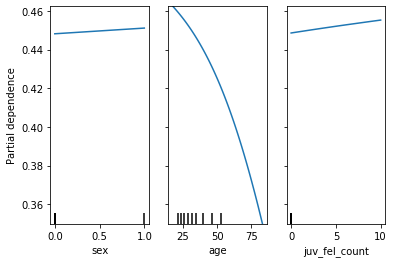

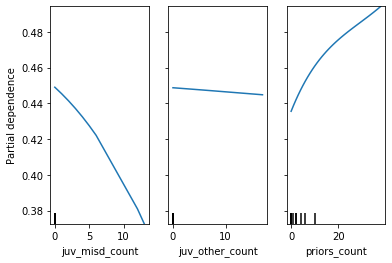

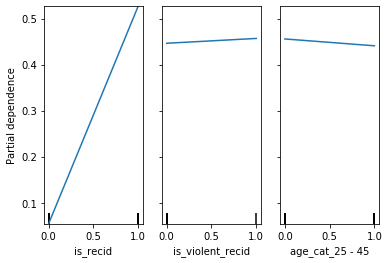

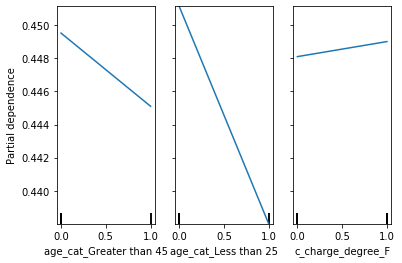

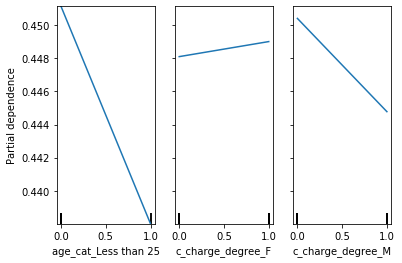

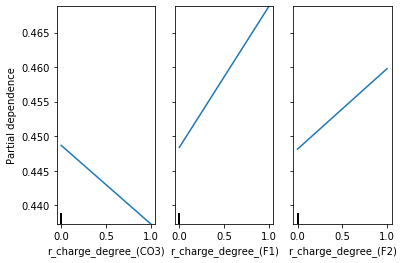

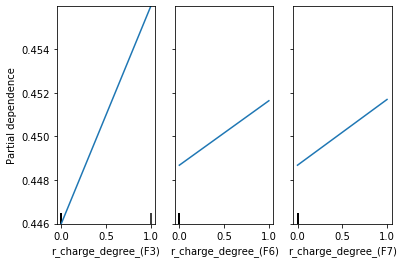

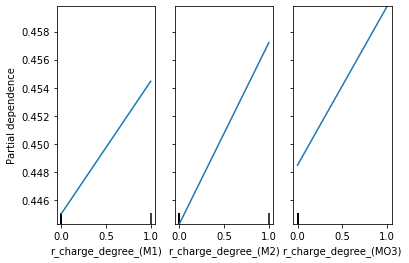

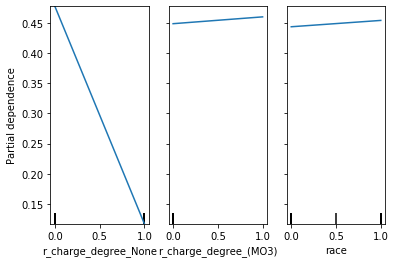

In [15]:
from sklearn.inspection import plot_partial_dependence, partial_dependence
features_names = compas_data.columns
features = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[10,11,12],[13,14,15],[16,17,18],[19,20,21],[22,21,23]]
for f in features: 
    plot_partial_dependence(logReg, X, f, feature_names=features_names)

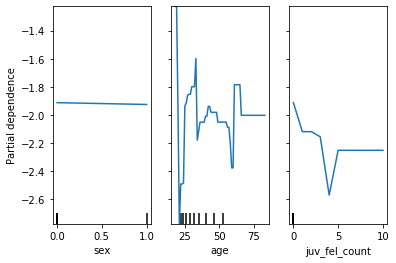

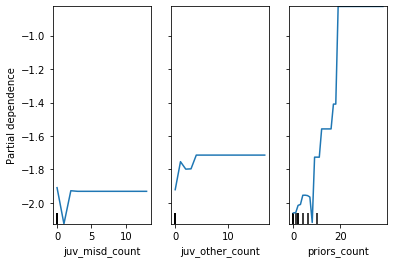

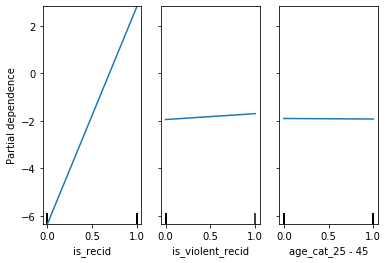

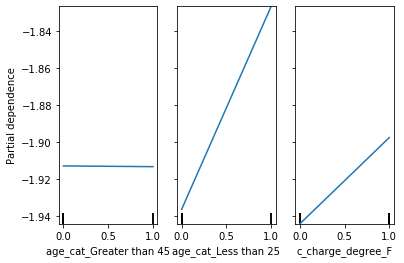

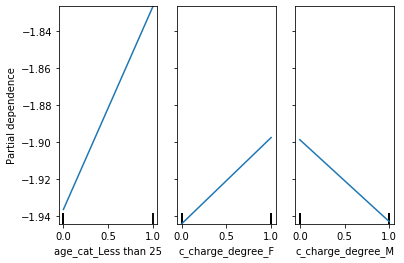

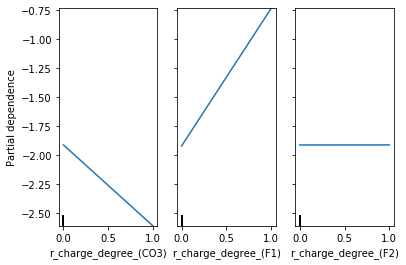

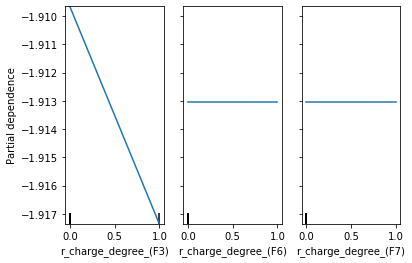

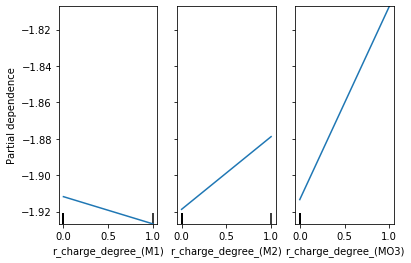

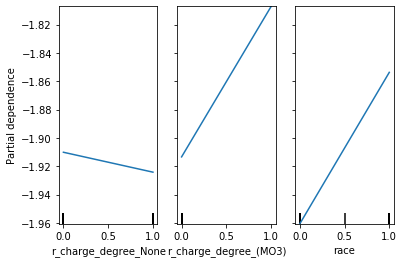

In [16]:
features_names = compas_data.columns
features = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[10,11,12],[13,14,15],[16,17,18],[19,20,21],[22,21,23]]
for f in features: 
    plot_partial_dependence(gradBoost, X, f, feature_names=features_names)

If you compare the two plots, we can see that Logistic Regression has a more consistent and natural feature importance. If you look at the juv_fel_count for both models, it make sense that as a person has more felony counts, they would be more likely to reoffend. This happens for Logistic Regression. However Gradient Boosting Classifier goes down, (then drastically up and down for 4).
Due to this I used Logistic Regression. 

### Feature importance interaction
We can use interp on the partial_dependence points to get the feature importance for an inputed feature.

In [17]:
#Test for sex = 1
pdp, axes = partial_dependence(logReg, X=X, features=[0])

x_coords = axes[0]
y_coords = pdp[0]

print("Sex: partial dependence values", y_coords)
print("Partial dependence for sex = 1", np.interp(1, x_coords,y_coords))

Sex: partial dependence values [0.44822884 0.4511716 ]
Partial dependence for sex = 1 0.4511715953553327


### Feature importance visuals
Here we will show how we take these partial_dependence points and generate a the visuals.

In [18]:
featureImportance = []
for i in range(len(features_names)):
    pdp, axes = partial_dependence(logReg, X=X, features=[i])
    
    featureData = {
        'pdp': pdp[0],
        'axes': axes[0],
        'name': features_names[i]
    }
    
    featureImportance.insert(i, featureData)

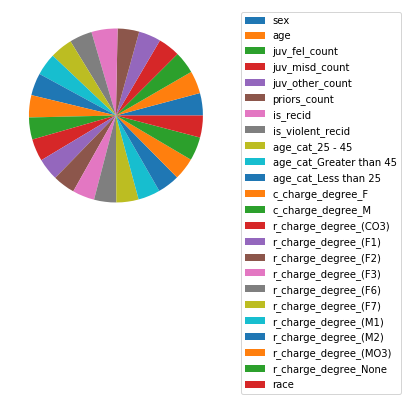

In [19]:
inputTest = [1, 25, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
inputTest2 = [0, 40, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


results = []
results_importance = []
for i in range(len(features_names)):
    pdp = featureImportance[i]['pdp']
    axes = featureImportance[i]['axes']
    name = featureImportance[i]['name']
    
    importance = np.interp(inputTest[i], axes, pdp)
    
    importance_data = {
        'importance': importance,
        'name': name
    }
    
    results.insert(i, importance_data)
    results_importance.insert(i, importance)

plt.pie(results_importance)
plt.legend(labels=features_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We have too many features due to the one-hot-encoding, therefore we need to reduce the features down to the categories. 

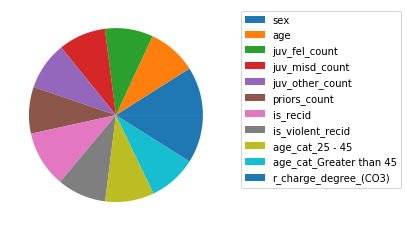

In [20]:
#len 9: sex - is_violet_recid
inputGroup1 = [0, 25, 0, 2, 1, 0, 2, 1, 1]
#len 3: age_cat
inputGroup2 = [1, 0, 0]
#len 12: r_charge_degree
inputGroup3 = [0,1,0,0,0,0,0,0,0,0,0,0]

featureNamesGroup1 = features_names[0:9]
featureNamesGroup2 = features_names[9:12]
featureNamesGroup3 = features_names[12:]


inputTest = [0, 25, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0,1,0,0,0,0,0,0,0,0,0,0]
shortedPDP = []
shortedFeatures = features_names[0:9].tolist()
for i in range(len(results)):
    if i >= 9:    
        if inputTest[i] == 1:
            shortedPDP.append(results[i]['importance'])
            shortedFeatures.append(results[i]['name'])
    else:
        shortedPDP.append(results[i]['importance'])

plt.pie(shortedPDP)
plt.legend(labels=shortedFeatures, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

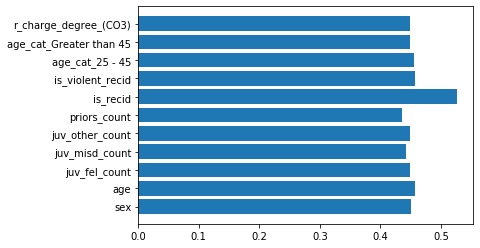

In [21]:
y_pos = np.arange(len(shortedPDP))

plt.barh(y_pos, shortedPDP)
plt.yticks(y_pos, shortedFeatures)
plt.show()

The pie chart looks better for comparing each value, and therefore we used the pie chart.

Next we will go into the line chart generation

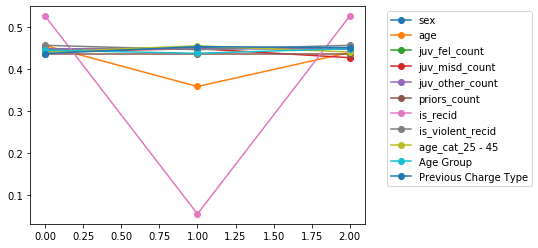

In [22]:
input1 = [0, 25, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0,1,0,0,0,0,0,0,0,0,0,0]
input2 = [1, 80, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,0,0,0,0,0,0,0,0,0,0,1]
input3 = [0, 40, 1, 5, 2, 0, 2, 1, 1, 0, 0, 1, 0,0,0,0,0,1,0,0,0,0,0,0]
inputs = [input1, input2, input3]


allShortedPDP = []
allShortedFeatures = []
for i in range(len(inputs)):
    shortedPDP = []
    shortedFeatures = features_names[0:9].tolist()
    for j in range(len(results)):
        if j < 9 or inputs[i][j] == 1: 
            pdp = featureImportance[j]['pdp']
            axes = featureImportance[j]['axes']
            name = featureImportance[j]['name']

            importance = np.interp(inputs[i][j], axes, pdp)
            
            shortedPDP.append(importance)
            shortedFeatures.append(results[j]['name'])
       
    allShortedPDP.append(shortedPDP)
    allShortedFeatures.append(shortedFeatures)

inputLen = len(allShortedPDP[0])
featureResultsPDP = []
for i in range(inputLen):
    ithFeaturePdp = [item[i] for item in allShortedPDP]
    featureResultsPDP.append(ithFeaturePdp)

featureResultsPDP[0]

shortenedFeatures = features_names[0:9].tolist()
shortenedFeatures.extend(["Age Group", "Previous Charge Type"])

for i in range(len(featureResultsPDP)):
    feature = shortenedFeatures[i]
    plt.plot(featureResultsPDP[i], label=feature, marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Here we can see all of the partial_dependence values for 3 different inputs displayed in the line chart.

## Trade-offs: Error types
For trade-offs between error types, we use predict_proba to get the probability of a positive class. We introduce a threshold for classifying a positive class. With a lower threshold we will have more positive cases, and therefore more false positives. 

In [23]:
compas_data_train = pd.read_csv('upsampled_race_train_dataset.csv')
y_train = compas_data_train.pop('two_year_recid').values
X_train = compas_data_train.values

compas_data_test = pd.read_csv('compas_test_dataset.csv')
y_test = compas_data_test.pop('two_year_recid').values
X_test = compas_data_test.values

In [24]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

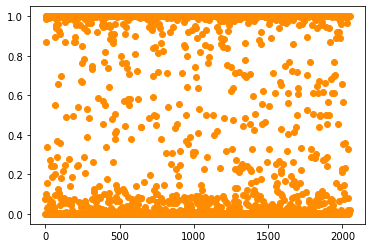

In [25]:
#The first column is the probability that target=0 and the second column is the probability that target=1[:,1]
y_pred_proba = logReg.fit(X_scaled, y_train).predict_proba(X_test)[:,1]
x_pred_proba = logReg.fit(X_scaled, y_train).predict_proba(X_test)[:,0]
plt.plot(y_pred_proba, 'o', color='darkorange')
plt.show()

In [26]:
# Change increment (0.5) to increase no. of threshold
thresholds = np.arange(0.0, 1.000005, 0.005)

In [27]:
FPs = []
FNs = []
TPs = []
TNs = []
for thresh in thresholds:
    FP=0
    FN=0
    TP=0
    TN=0
    thresh = round(thresh,3) #Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
    for i in range(len(y_pred_proba)):
        #print("Proba: %.5f, Thresh %.2f" %(y_pred_proba[i], thresh))
        if (y_pred_proba[i] >= thresh):
            if y_test[i] == 0:
                FP = FP + 1
            if y_test[i] == 1:
                TP = TP + 1
        if (y_pred_proba[i] < thresh):
            if y_test[i] == 1:
                FN = FN + 1
            if y_test[i] == 0:
                TN = TN + 1
                
    FPs.append(FP)
    FNs.append(FN)
    TPs.append(TP)
    TNs.append(TN)

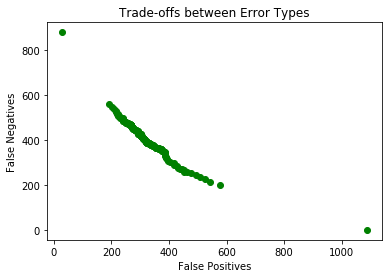

In [28]:
import matplotlib.pyplot as plt
plt.plot(FPs, FNs, 'o', color='green')
plt.title("Trade-offs between Error Types")
plt.xlabel('False Positives')
plt.ylabel('False Negatives')
plt.show()

## Trade-offs: Accuracy vs Fairness

Here we will generate Pareto optimal models in which one cannot be increased without the other decreasing, to represent the trade-offs between accuracy and fairness. We will first need to make a cost-sensitive classifier which calculated sample weights based on race, and inputted theta values.

The theta values will be inputted by the user to change the degree in which we prioritize between accuracy and fairness. 

We will create 4 scores,disparity (un-fairness), total errors (un-accurate),  fairness (1/disparity) and accuracy. With this we can see if we can generate a pareto curve using fairness and accuracy, or if we need to use disparity and total errors (which is done in other research).

A grid search is then done to find the values for theta to generate out Pareto front.

In [29]:
from sklearn.linear_model.base import BaseEstimator

compas_data_train = pd.read_csv('upsampled_race_train_dataset.csv')
y_train = compas_data_train.pop('two_year_recid').values
X_train = compas_data_train.values

compas_data_test = pd.read_csv('compas_test_dataset.csv')
y_test = compas_data_test.pop('two_year_recid').values
X_test = compas_data_test.values

C:\Users\darcy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
class weightedLogReg(BaseEstimator):
    def __init__(self, theta0 = 0, theta1 = 0):
        self.theta0 = theta0
        self.theta1 = theta1
        self.output_function = LogisticRegression(max_iter=10000)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        print("hi")
        # Check that X and y have correct shape
        #X, y = check_X_y(X, y)
        
        sampleWeights = []
        for row in X:
            a = row[2]
            z = 0
            
            if (self.theta1 >= self.theta0):
                z = 1
            
            c0 = 1*(z==1) + self.theta1*(1*(z==1 and a==1)) - 1*(z==1 and a==0)
            c1 = 1*(z==0) + self.theta0*(1*(z==0 and a==1)) - 1*(z==0 and a==0)
            
            if (c0 < c1):
                z = 0
                c0 = 1*(z==1) + self.theta1*(1*(z==1 and a==1)) - 1*(z==1 and a==0)
                c1 = 1*(z==0) + self.theta0*(1*(z==0 and a==1)) - 1*(z==0 and a==0)
            
            weight = abs(c0 - c1)
            sampleWeights.append(weight)
        self.output_function.fit(X, y, sample_weight=sampleWeights)    
        return self
    
    def predict(self, X):
        return self.output_function.predict(X)
    
    def predict_proba(self, X):
            return self.output_function.predict_proba(X)

    def get_params(self, deep=True):
        return {"theta0": self.theta0, 
                "theta1": self.theta1
                }
    
    def model_error(self):
        from sklearn.metrics import confusion_matrix
        X = self.X
        y = self.y
        
        a0_X = []
        a1_X = []
        a0_y = []
        a1_y = []
    
        for i in range(X.shape[0]):
            if X[i][2] == 1:
                a1_X.append(X[i])
                a1_y.append(y[i])
            else:
                a0_X.append(X[i])
                a0_y.append(y[i])
        
        a0_y_pred = self.predict(a0_X)
        a0_cm = confusion_matrix(a0_y, a0_y_pred)
        a0_fp = a0_cm[0, 1]
        a0_fn = a0_cm[1, 0]
        
        a1_y_pred = self.predict(a1_X)
        a1_cm = confusion_matrix(a1_y, a1_y_pred)
        a1_fp = a1_cm[0, 1]
        a1_fn = a1_cm[1, 0]
        
        y_pred = self.predict(X)
        cm = confusion_matrix(y, y_pred)
        tp = cm[1, 1]
        tn = cm[0, 0]
        fp = cm[0, 1]
        fn = cm[1, 0]
        err = (fp+fn)
        
        return err + self.theta0*(a1_fp - a0_fp) + self.theta1*(a1_fn - a0_fn)

In [31]:
from sklearn.metrics import confusion_matrix
def error_scorer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[1, 1]
    fn = cm[0, 0]
    tp = cm[0, 1]
    tn = cm[1, 0]
    
    #err = (fp+fn)/(tp+tn+fn+fp)
    err = fp+fn
    
    return err

def disparity_scorer(estimator, X, y):
    a0_X = []
    a1_X = []
    a0_y = []
    a1_y = []
    for i in range(X.shape[0]):
        if X[i][2] == 1:
            a1_X.append(X[i])
            a1_y.append(y[i])
        else:
            a0_X.append(X[i])
            a0_y.append(y[i])
        
    a0_y_pred = estimator.predict(a0_X)
    a0_cm = confusion_matrix(a0_y, a0_y_pred)
    a0_fp = a0_cm[0, 1]
    a0_fn = a0_cm[1, 0]
        
    a1_y_pred = estimator.predict(a1_X)
    a1_cm = confusion_matrix(a1_y, a1_y_pred)
    a1_fp = a1_cm[0, 1]
    a1_fn = a1_cm[1, 0]
    
    #disparity = #(estimator.theta0*(a1_fp - a0_fp) + estimator.theta1*(a1_fn - a0_fn))
    disparity = max(abs(a1_fp - a0_fp),abs(a1_fn - a0_fn))
    #sign flip for loss function, want to minimize disparity
    return disparity

def fairness_scorer(estimator, X, y):
    a0_X = []
    a1_X = []
    a0_y = []
    a1_y = []
    for i in range(X.shape[0]):
        if X[i][2] == 1:
            a1_X.append(X[i])
            a1_y.append(y[i])
        else:
            a0_X.append(X[i])
            a0_y.append(y[i])
        
    a0_y_pred = estimator.predict(a0_X)
    a0_cm = confusion_matrix(a0_y, a0_y_pred)
    a0_fp = a0_cm[0, 1]
    a0_fn = a0_cm[1, 0]
        
    a1_y_pred = estimator.predict(a1_X)
    a1_cm = confusion_matrix(a1_y, a1_y_pred)
    a1_fp = a1_cm[0, 1]
    a1_fn = a1_cm[1, 0]
    
    #disparity = #(estimator.theta0*(a1_fp - a0_fp) + estimator.theta1*(a1_fn - a0_fn))
    disparity = max(abs(a1_fp - a0_fp),abs(a1_fn - a0_fn))
    #sign flip for loss function, want to minimize disparity
    return 1/disparity

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

wLogReg = weightedLogReg()

pipe = Pipeline(steps=[('weightedLogistic', wLogReg)])

#The final model and report did a range of 0 - 100, 
#however for a quicker repersentation of the Parteo curve we can do 1-10
param_grid = {
    'theta0': np.arange(0.0, 100, 1),
    'theta1': np.arange(0.0, 100, 1)
}


scoring = {
    'error': make_scorer(error_scorer),
    'accuracy': make_scorer(accuracy_score),
    'disparity': disparity_scorer,
    'fairness': fairness_scorer,
}

search = GridSearchCV(wLogReg, param_grid, n_jobs=-1, scoring=scoring, refit=False)
search.fit(X_train, y_train)

results = pd.DataFrame(search.cv_results_)

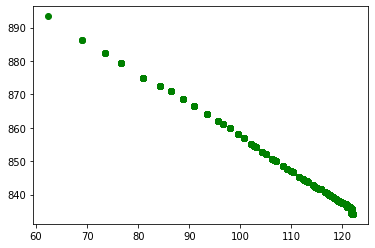

In [36]:
meanError = search.cv_results_['mean_test_error']
meanAccuracy = search.cv_results_['mean_test_accuracy']
meanDis = search.cv_results_['mean_test_disparity']
meanFairness = search.cv_results_['mean_test_fairness']

plt.plot(meanDis, meanError,'o', color='green')

In [ ]:
plt.plot(meanFairness, meanAccuracy,'o', color='green')

As you can see only the disparity vs errors resulted in a Pareto curve, and therefore this model was used. Once we have the the final Pareto model, we remove duplicates to get the Pareto front.

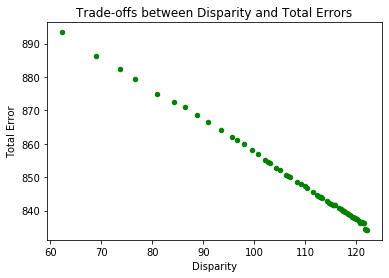

In [39]:
theata0 = search.cv_results_['param_theta0']
theata1 = search.cv_results_['param_theta1']

d = {'Total Error': meanError, 'Disparity': meanDis,
     'theata0': theata0, 'theata1': theata1 }
df = pd.DataFrame(data=d)

df_asc = df.sort_values("Total Error")
df_asc.drop_duplicates(subset ="Disparity",keep='first', inplace=True)
df_asc.plot(kind='scatter', x='Disparity', y='Total Error', color='green', title="Trade-offs between Disparity and Total Errors")